In [1]:
pip install Crypto.Cipher

Note: you may need to restart the kernel to use updated packages.


# Importing dependencies

In [16]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import seaborn as sns
import pandas as pd


import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

import random
import string
from Crypto.Cipher import AES

In [49]:
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

## Taking input

In [64]:
with open('sound1.wav', 'rb') as fd:
    contents = fd.read()

## Playing that sound

In [65]:
#sd.play(data, fs)
ipd.Audio('sound1.wav')

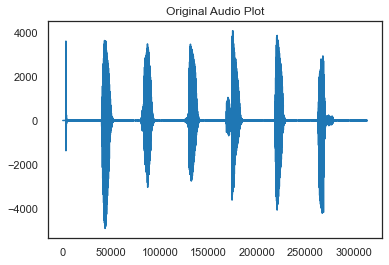

In [66]:
fs, data = wavfile.read('sound1.wav')
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)

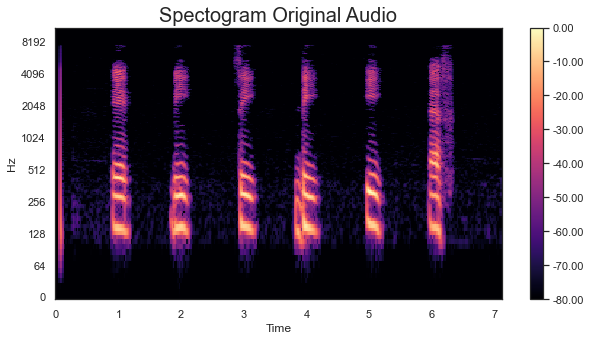

In [67]:
y, sr = librosa.load('sound1.wav')
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Original Audio', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

## Getting ready with AES

In [54]:
AES_KEY = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(32))

AES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(16))

In [55]:
print("AES Key is ", AES_KEY)
print("AES Initialization vector is ", AES_IV)

AES Key is  RxQ0pEqaIeet3D0wjA7QoT9LZyprbmsE
AES Initialization vector is  nfg5c8FWZBAc7nK0


## Encrpytion of audio file

In [56]:
encryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV.encode("utf-8"))
encrypted_audio = encryptor.encrypt(contents)

## Saving the encrypted file

In [57]:
with open('encrypted_audio_file.wav', 'wb') as fd:
    fd.write(encrypted_audio)
print("A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated")

A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated


ValueError: File format b'<\xd6\x86\xa1' not understood. Only 'RIFF' and 'RIFX' supported.

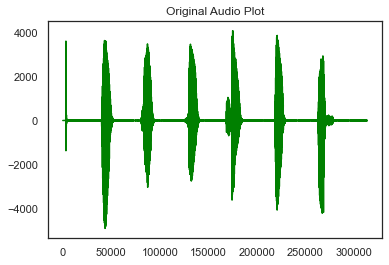

In [70]:
fs, data = wavfile.read('sound1.wav')
plt.plot(data,color='green')            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")
fs1, e = wavfile.read('encrypted_audio_file.wav')
plt.plot(e,color='red')
plt.title("Encrypted Audio Plot")

## Loading

In [58]:
with open('encrypted_audio_file.wav', 'rb') as fd:
    contents = fd.read()

## Decryption of data

In [59]:
decryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV.encode("utf-8"))
decrypted_audio = decryptor.decrypt(contents)

In [60]:
with open('decrypted_audio_file.wav', 'wb') as fd:
    fd.write(decrypted_audio)

In [61]:
#sd.play(data, fs)
ipd.Audio('decrypted_audio_file.wav')

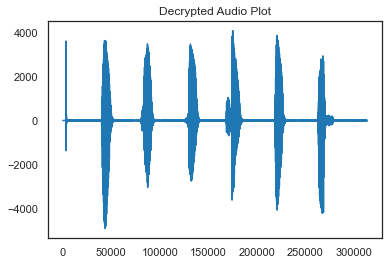

In [62]:
fs, data = wavfile.read('decrypted_audio_file.wav')
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Decrypted Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)

Text(0.5, 1.0, 'Decrypted Audio Plot')

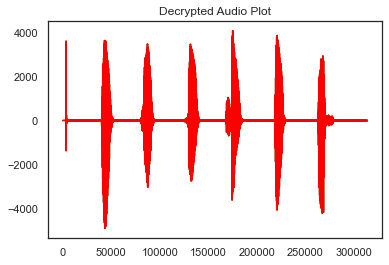

In [71]:
fs, data = wavfile.read('sound1.wav')
plt.plot(data,color='green')            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")
plt.plot(data,color='red')
plt.title("Decrypted Audio Plot")

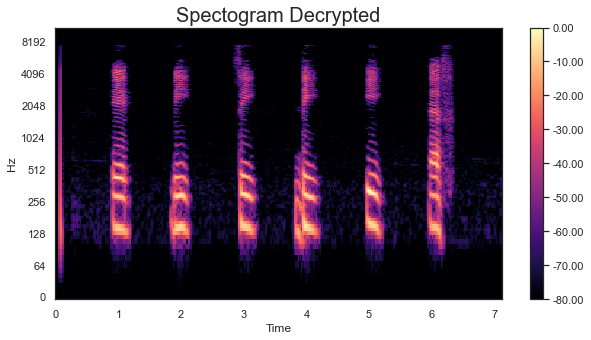

In [63]:
y1, sr1 = librosa.load('decrypted_audio_file.wav')
D1 = librosa.stft(y1)
S_db1 = librosa.amplitude_to_db(np.abs(D1), ref=np.max)
fig1, ax1 = plt.subplots(figsize=(10, 5))
img1 = librosa.display.specshow(S_db1,
                              x_axis='time',
                              y_axis='log',
                              ax=ax1)
ax1.set_title('Spectogram Decrypted', fontsize=20)
fig.colorbar(img1, ax=ax1, format=f'%0.2f')
plt.show()